# <span style = "color:IndianRed; font-size:40px"> satellite </span>

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn import metrics
import glob

### Fetch the training Data

#### Use glob

The data contains 4 subclasses. Store all 4 in different variables

In [2]:
cloud=glob.glob('cloudy/*.jpg')
desert=glob.glob('desert/*.jpg')
green=glob.glob('green_ares/*.jpg')
water=glob.glob('water/*.jpg')

### Store all the images inside a list and create a list with the corresponding labels

In [3]:
dic={0:'cloud',1:'desert',2:'green',3:'water'}

In [4]:
image=[]
label=[]

for i in cloud:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in desert:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in green:
    img=plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in water:
    img=plt.imread(i)
    image.append(img)
    label.append(3)

## print some images

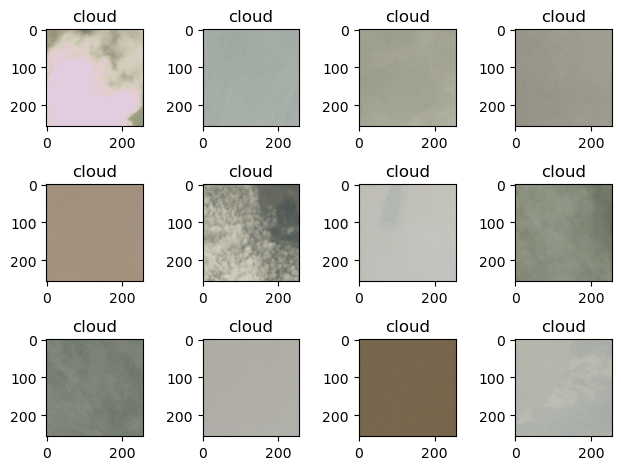

In [5]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(dic[label[i]])
plt.tight_layout()

### Shuffle both image list and label list 

In [6]:
image,label=shuffle(image,label)

### Plot a few images from our shuffled list with its corresponding label 

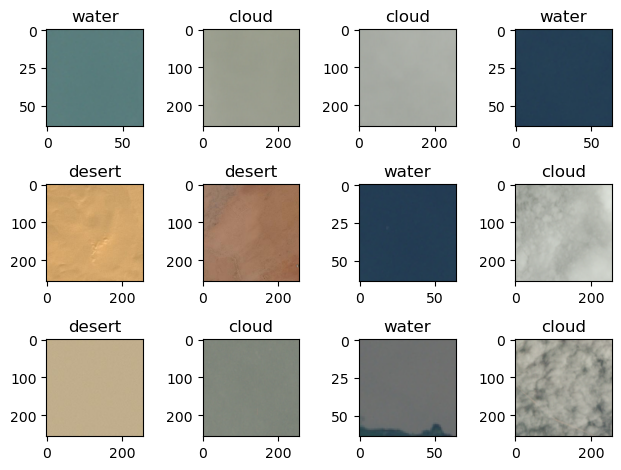

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(dic[label[i]])
plt.tight_layout()

### Reshape the images to 224x224

In [8]:
d=[]

for i in image:
    d.append(resize(i,(224,224,3)))

### Plot some of our reshaped images

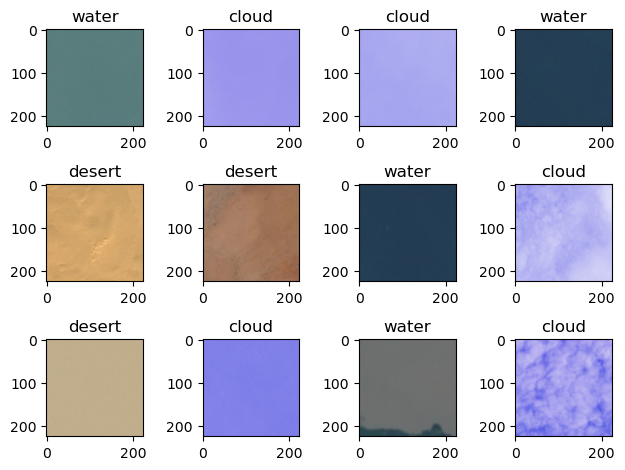

In [9]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(d[i])
    plt.title(dic[label[i]])
plt.tight_layout()

### Convert list as numpy arrays 

In [11]:
X=np.array(d)
y=np.array(label)

## split train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [15]:
model=keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid')
])

### Compile the model

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Check the summary of our model

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

### Train the model. 
Make sure to include a validation data with validation_split

In [18]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
99/99 [==============================] - 76s 740ms/step - loss: 0.2877 - accuracy: 0.9101 - val_loss: 8.8426e-04 - val_accuracy: 1.0000
Epoch 2/10
99/99 [==============================] - 73s 735ms/step - loss: 0.0719 - accuracy: 0.9818 - val_loss: 0.0089 - val_accuracy: 0.9940
Epoch 3/10
99/99 [==============================] - 74s 744ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 1.1184e-05 - val_accuracy: 1.0000
Epoch 4/10
99/99 [==============================] - 72s 730ms/step - loss: 2.6528e-05 - accuracy: 1.0000 - val_loss: 6.7762e-06 - val_accuracy: 1.0000
Epoch 5/10
99/99 [==============================] - 72s 731ms/step - loss: 2.0210e-05 - accuracy: 1.0000 - val_loss: 4.9432e-06 - val_accuracy: 1.0000
Epoch 6/10
99/99 [==============================] - 72s 729ms/step - loss: 1.5288e-05 - accuracy: 1.0000 - val_loss: 3.8970e-06 - val_accuracy: 1.0000
Epoch 7/10
99/99 [==============================] - 74s 746ms/step - loss: 1.3512e-05 - accuracy: 1.0000 - val

### Evaluate the model

In [19]:
model.evaluate(X_train,y_train)

104/104 [==============================] - 21s 191ms/step - loss: 6.6357e-06 - accuracy: 1.0000


[6.635744739469374e-06, 1.0]

### Make predictions with X_test

In [20]:
y_pred=model.predict(X_test)

26/26 [==============================] - 6s 188ms/step


In [21]:
y_pred=[np.argmax(i) for i in y_pred]

## accuracy score

In [22]:
metrics.accuracy_score(y_test,y_pred)

1.0

### Visualise confusion matrix on a heatmap

<Axes: >

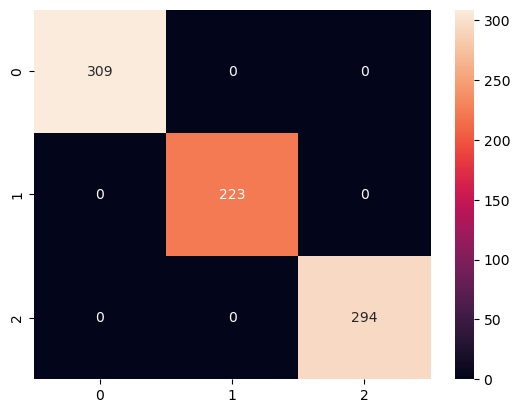

In [24]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

***

## classification_report

In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       223
           3       1.00      1.00      1.00       294

    accuracy                           1.00       826
   macro avg       1.00      1.00      1.00       826
weighted avg       1.00      1.00      1.00       826

